2. Examine the data:
    * Look at the datasets shape(rows and columns) * Peek inside the dataset by looking at its first 10 or 20 rows. 
    * Perform fundamental statistical analysis such as mean,sd,minimum,maximum etc... 
    * Check and handle missing data step
3. Split the data into training and test subsets 
    * 80% for training and 20% for testing 
    * The training subset is used to train the model 
    * The testing subset is used to evaluate how well the model generalizes to unseen data.(data not used in training)
4. Visualising the data 
    * After splitting the dataset plot some graphs for better understanding of the investigating data 
    * Ex: Scatter plots are easy to investigate the relationship between the features and the target variable
5. Data preprocessing 
    * The data that we receieved is not ready to use immediately.There will be some missing values. 
    * Ex:Red,Green,Blue(Textual or categorical)

    * A range of features that differ too much(A feature ranging 0-10000 and another from 0-5) 
    * Also called as data cleaning.Therefore we need to process the data before passing it to the model.
6. Prime the models 
    * Based on the previous steps of analysing the dataset,narrow down appropriate machine learning algorithms and build modles using those algorithms.
7. Evaluate the models 
    * After building the models,it must be evaluated using different matrix and select the best model for deployment.

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
arr1 = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr1.sum())
print(arr1.sum(axis=0)) #columnwise
print(arr1.sum(axis=1))

36
[ 6  8 10 12]
[10 26]


In [4]:
print(arr1.mean())
print(arr1.mean(axis=0))
print(arr1.mean(axis=1))

4.5
[3. 4. 5. 6.]
[2.5 6.5]


In [5]:
arr1 = np.array([[1, 2], [3, 4], [5, 6]])
arr2 = np.array([[7, 8]])
combined_array = np.concatenate((arr1, arr2))
print(combined_array)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


Scikit-learn is a massive Python library that comes with an extensive assortment of classes and functions for performing various machine learning tasks.
These classes and functions are grouped into numerous modules that are intuitively named.
For instance, 
- classes for building decision tree-based models are found in the sklearn.tree module. 
- classes for data preprocessing are in the sklearn.preprocessing module.
The classes themselves are also named appropriately.

## Estimators and fit() method

The estimator object learns from input data using fit() method.
This fit() method in this class estimates mean and variance of the features in the input dataset and stores the results in mean_,var_ attributes.

## Transformers and transform() method

It transforms the datasets using transform() method .
The transform() method accepts array as input and uses the parameters calculated by the fit method of the same object and returns the transformed dataset.

## Standardization

The objective of scaling a dataset using StandardScalar is to achieve a mean of zero and variance of one.This process is known as standardization. It is necesaary for machine learning algorithms.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = pd.DataFrame({'A':[1, 2, 3, 2], 'B':[11, 1, 8, 3]})
scaler = StandardScaler() 
scaler.fit(X) 
print(scaler.mean_)
print(scaler.var_)
print(scaler.scale_)

[2.   5.75]
[ 0.5    15.6875]
[0.70710678 3.96074488]


In [7]:
X_scaled=scaler.transform(X)
print(X_scaled)

[[-1.41421356  1.32550825]
 [ 0.         -1.19926937]
 [ 1.41421356  0.56807496]
 [ 0.         -0.69431384]]


## Predictors and predict() method

It is used to make predictions for given dataset with help of predict() method.
The predict method uses the parameters calculated by the fit() method

# Data preprocessing with scikit learn

Data preprocessing involves handling missing data,encoding text and categorical data and features scaling.

In [8]:
df = pd.read_csv('test_data.csv')
print(df)

   Color  Years  Strength  Height       Weight Dangerous
0  Green    2.3     210.0   170.0  20 to 30 kg       Yes
1    Red    4.1     100.0     NaN  10 to 20 kg        No
2   Blue    1.4       NaN   412.0   0 to 10 kg        No
3  Green    NaN     313.0   123.0  10 to 20 kg       Yes
4    NaN    5.2     512.0   372.0   0 to 10 kg       Yes


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
imp.fit(df[['Years', 'Strength', 'Height']])
df[['Years', 'Strength', 'Height']] = imp.transform(df[['Years', 'Strength', 'Height']])
print(df)

   Color  Years  Strength  Height       Weight Dangerous
0  Green   2.30    210.00  170.00  20 to 30 kg       Yes
1    Red   4.10    100.00  269.25  10 to 20 kg        No
2   Blue   1.40    283.75  412.00   0 to 10 kg        No
3  Green   3.25    313.00  123.00  10 to 20 kg       Yes
4    NaN   5.20    512.00  372.00   0 to 10 kg       Yes


In [12]:
print(imp.statistics_)

[  3.25 283.75 269.25]


In [13]:
imp.set_params(strategy='most_frequent')
imp.fit(df[['Color']])
df[['Color']] = imp.transform(df[['Color']])
print(df)

   Color  Years  Strength  Height       Weight Dangerous
0  Green   2.30    210.00  170.00  20 to 30 kg       Yes
1    Red   4.10    100.00  269.25  10 to 20 kg        No
2   Blue   1.40    283.75  412.00   0 to 10 kg        No
3  Green   3.25    313.00  123.00  10 to 20 kg       Yes
4  Green   5.20    512.00  372.00   0 to 10 kg       Yes


It can be done with OrdinalEncoder or LabelEncoder class. OrdinalEncoder is desined to work with features of the dataset while LabelEncoder is designed to work with labels. The fit method of LabelEncoder requires a 1D array but OrdinalEncoder class requires 2D array.

In [14]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Dangerous'] = le.fit_transform(df['Dangerous'])
print(df)

   Color  Years  Strength  Height       Weight  Dangerous
0  Green   2.30    210.00  170.00  20 to 30 kg          1
1    Red   4.10    100.00  269.25  10 to 20 kg          0
2   Blue   1.40    283.75  412.00   0 to 10 kg          0
3  Green   3.25    313.00  123.00  10 to 20 kg          1
4  Green   5.20    512.00  372.00   0 to 10 kg          1


## Hot Encoding algorithm

A common approach to encode non ordinal features.
Here each categorical value is converted to a new column and assigned a value of 0 or 1.
OneHotEncoder class in sklearn.preprocessing module is used for this purpose.
The OneHotEncoder class returns as sparse matrix by default.
A sparse matrix is a matrix which consists of very few non zero values.

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
color_encoded = ohe.fit_transform(df[['Color']])
df2 = pd.DataFrame(color_encoded.toarray(), columns = ohe.get_feature_names_out())
df = pd.concat((df, df2), axis = 1)
print(df)

   Color  Years  Strength  Height       Weight  Dangerous  Color_Blue  \
0  Green   2.30    210.00  170.00  20 to 30 kg          1         0.0   
1    Red   4.10    100.00  269.25  10 to 20 kg          0         0.0   
2   Blue   1.40    283.75  412.00   0 to 10 kg          0         1.0   
3  Green   3.25    313.00  123.00  10 to 20 kg          1         0.0   
4  Green   5.20    512.00  372.00   0 to 10 kg          1         0.0   

   Color_Green  Color_Red  
0          1.0        0.0  
1          0.0        1.0  
2          0.0        0.0  
3          1.0        0.0  
4          1.0        0.0  


## Feature scaling

- It is a technique for calibrating the range of features in a dataset.
- It ensures that features do not have vastly different scales and prevents features with large values from dominating the result of the algorithm

`Euclidean distance = sqrt((p-q)^2+(r-s)^2)`

## Standardization: 
Standardization scales a feature such that mean become 0 and variance becomes 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler()
df[['Years', 'Strength', 'Height']] = mms.fit_transform(df[['Years','Strength', 'Height']])
print(df) #Here years,strength and height are scaled to a range of 1.

   Color     Years  Strength    Height       Weight  Dangerous  Color_Blue  \
0  Green  0.236842  0.266990  0.162630  20 to 30 kg          1         0.0   
1    Red  0.710526  0.000000  0.506055  10 to 20 kg          0         0.0   
2   Blue  0.000000  0.445995  1.000000   0 to 10 kg          0         1.0   
3  Green  0.486842  0.516990  0.000000  10 to 20 kg          1         0.0   
4  Green  1.000000  1.000000  0.861592   0 to 10 kg          1         0.0   

   Color_Green  Color_Red  
0          1.0        0.0  
1          0.0        1.0  
2          0.0        0.0  
3          1.0        0.0  
4          1.0        0.0  


## Pipeline and column transformer

- Pipeline allows us to chain different machine learning tasks by combining multiple estimators into a composite estimator.
- For example we can use a pipeline to chain a simpleimputer estimator with MinMaxScalar estimator.
- All but the last estimator in the pipeline must have the transform method while the last estimator only needs to have a fit method.

1. we create a dataframe with 1 column and 5 rows.
2. Import pipeline class from sklearn.pipeline
3. Pipeline constructor accepts a list of (Name,Estimator) as input. These tuples represent a task in the pipeline and are arranged according to the order of task. Name is user defined string whereas estimator is the estimator class needed to perform the task. Ex: imp and scaler are names whereas simpleImputer and MinMaxScaler are estimators.
Column transformer

It is similar to pipeline except that it is only for data transformation.
All the estimators in the column transformer must have transform() method.

In [17]:
from sklearn.compose import ColumnTransformer


data = pd.DataFrame([[1], [4], [np.NaN], [8], [11]], columns=['A'])


ct = ColumnTransformer([('imp', SimpleImputer(strategy="mean"), ['A']), ('scaler', MinMaxScaler(), ['A']) ])
print(ct.fit_transform(data))

[[ 1.   0. ]
 [ 4.   0.3]
 [ 6.   nan]
 [ 8.   0.7]
 [11.   1. ]]


## Model Evaluation with scikit learn

- Supervised Machine Learning evaluates typically involves comparing the results predicted by our model with the actual labels in the dataset.
- The classification models predict labels with discrete values(Ex:dog,cat,bird)
- The Regression models predict labels with continuous values.(Ex:1.32,53.7,25.5)
* Commonly used classfication metrics are 
    1. Accuracy 
    2. Precision 
    3. Recall

### Accuracy refers to the fraction of instances predicted correctly by our model.

- It ranges from 0-1 with 1 indicating 100% accuracy.
- accuracy_score() function in sklearn.metrics module
- The function requires true labels and predicted labels.

In [20]:
from sklearn.metrics import accuracy_score
true=['Cat','Cat','Dog','Dog','Cat','Dog']
pred=['Cat','Cat','Dog','Dog','Cat','Cat']
score=accuracy_score(true,pred)
print(score)

0.8333333333333334


### Precision and Recall

- To understand precision and recall we need to know confusion matrix

` true=['Cat','Cat','Dog','Dog','Cat','Dog'] `

` pred=['Cat','Cat','Cat','Dog','Cat','Cat'] `

True value predicted value Dog Cat

Dog 1(TP) 2(FN)

Cat 0(FP) 3(TN)

where TP is True Positive,FN is False Negative,FP is False Positive,TN is True Negative.

In the above example if we consider dog as positive and cat as negative,if an instance is predicted as positive it can be either true positive or false positive.

TP is an outcome where an instance is correctly predicted.(1) FP is an outcome where it is incorrectly precicted.(0) If an instance is predicted as negative,it can either be False Negative or True Negative outcome. FN is an outcome where an instance is incorrectly predicted as negative(2) TN is and outcome where an instance is correctly predicted as Negative.(3) Among 5 negative 2 of them are predicted wrong and 3 of them are predicted correctly.
Our model's objective is to minimize both FP and FN since both are undesirable outcomes.

A model used to predict the presence of malignant tumour,we want to minimize FN(Negative indicating presence of tumour) outcomes. On the other hand if we are training to classify investment oppurtunities we have to minimize FP outcomes. Since we dont want to invest in something that ends up being unprofitable.
TP,FP,FN are used in calculating precision and Recall Precision=TP/(TP+FP) For our example TP=1/(1+0)=1

Recall measures the percentage accuracy of our classifier when the true value of an instance is positive. Recall=TP/(TP+FN) For our example TP=1/(1+2)=1/3=0.33

In [24]:
from sklearn.metrics import precision_score, recall_score


true = ['Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog']
pred = ['Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat']


precision = precision_score(true, pred, pos_label = 'Dog')
recall = recall_score(true, pred, pos_label = 'Dog')


print(precision)
print(recall)

1.0
0.3333333333333333


In [22]:
precision = precision_score(true, pred, pos_label = 'Cat')
recall = recall_score(true, pred, pos_label = 'Cat')


print(precision)
print(recall)

0.6
1.0


### Regression metrics

1. Root Mean Square Error
2. R-Squared Error

### Root Mean Square Error(RMSE)

It is the square root of Mean Squared Error(MSE)
MSE is determined by calculating mean of the squared differences between the true and predicted values.

Ex: pred=[2.1,1.4,5.6,7.9] true=[2.5,1.6,5.1,6.8] Step 1:Find the differences between the true and predicted values diff=[-0.4,-0.2,0.5,1.1] sqr=[0.16,0.04,0.25,1.21] mean=0.415 RMSE=0.644

Advantages: 
1. The larger errors are amplified compared to smaller errors.This forces our model to focus on reducing large errors. 
2. RMSE uses same unit as target variable and makes it easier for us to interpret the RMSE.

### R-Squared Error:

It measures how much of variance is in the target variable can be explained by our model.
Variance is a measure of how far the true values are from their mean.

Ex: pred=[2.1,1.4,5.6,7.9] true=[2.5,1.6,5.1,6.8] difference between pred and true values=[-0.4,-0.2,0.5,1.1] sqr=[0.16,0.04,0.25,1.21] ssd=1.66 mean of true values=4 Diff b/w true values and mean=[-1.5,-2.4,1.1,2.8] squeared differnces=[2.25,5.76,1.21,7.84] sum of squared differences(ssd)=17.06 R-Squared = 1-(1.66/17.06) = 0.902696


In [25]:
from sklearn.metrics import r2_score, mean_squared_error
pred = [2.1, 1.4, 5.6, 7.9]
true = [2.5, 1.6, 5.1, 6.8]
RMSE = mean_squared_error(true, pred, squared=False)#mean squared error function gives us mse by default
#To get RMSE we need to pass squared=False
r2 = r2_score(true, pred)
print(RMSE)
print(r2)

0.6442049363362565
0.902696365767878


d:\College\value_added_course\.conda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## There are several approaches to model selection 

### Method 1 
1. Train Test Split One approach is to split our dataset into training and test subsets and train differenct models using the training set. 
2. Evaluate the model on the training set and select the best performing model.

### Method 2: k-fold tross-validation
- It involves splitting our dataset into k subsets known as k folds.
- Out of the k folds k-1 of them are used for training while the remaining fold is used for validation.
- The algorithm is trained and tested k times,each time using a new fold as the validation set.
- Finally the result of the process is the average of the results obtained on each run.

Regression

Regression is a form of analysis that attempts to determine the relationship between a dependent variable(target variable) and a series of other variables(independent variables or predictor variables or features).
After determining the relationship we can use that to make predictions for the target variable when given new feature values.
The target variable in regression is always continuous values.

Commonly used machine learning algorithms for regression 1.Linear Regression 2.Polynomial Regression 3.Support vector Regression
Linear Regression

It attempts to find a linear relationship between the target and predictor variable.
It is expressed as y=a0 + a1x1 + a2x2 + a3x3 +.......+ anxn where y is the target variable and x1,x2,x3 are the predictor varibales or features.
a0,a1,a2 are the parameters(coefficients or weights)
The main objective of the linear regression is to determine the best values for these parameters.

Single Linear Regression

A Single Linear Regression that involves only one feature.

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
#step1 Loading data
housing =pd.read_csv("housing.csv")
#step2 Examine the data
housing.head()

,Floor Area (sqft),Value ($1000)
0,665.0,161.0
1,442.0,83.0
2,302.0,53.0
3,336.0,57.0
4,673.0,152.0


In [27]:
housing.isnull().sum()

Floor Area (sqft)    0
Value ($1000)        0
dtype: int64

In [28]:
X = housing[['Floor Area (sqft)']]
y = housing['Value ($1000)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Price in $1000s')

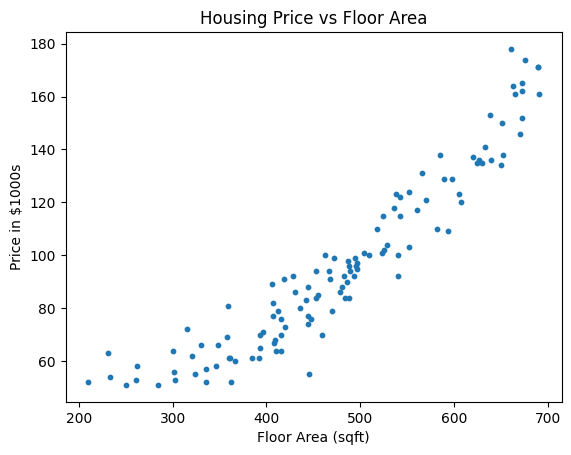

In [29]:
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)
plt.title('Housing Price vs Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Price in $1000s')

Classification

Classification is similar to regression except that instead of predicting continuous values,it is concerned with prediction of discrete values.
Ex: Prediciting emails that is spam or non-spam Prediciting animals whether it is cat or dog or others
Machine Learning algorithms for classifictaion 1.Decision tree 2.Random forest 3.Support vector Machine(SVM) 4.Logistic Regression

Gini impurity = 1- Sum of P(k)^2 for all the classes
    where P(k) stands for the proportion of instances that belongs to class k in a particular subset.

Random forest algorithm
_______________________

* The decision tree algorithm is an intuitive algorithm that is very easy to interpret,but they tend to be unstable.
* That is a slight change in dataset can significantly change the tree structure,hence decision trees are relatively inaccurate when making predictions.
* To resolve the above issue use an ensemble of decision trees to make multiple predictions and return the final prediction  based on an aggregate function.
* This approach is calle